In [1]:
import pandas as pd
import numpy as np

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [4]:
import warnings

In [5]:
plt.rc('font', size=12) #controls default text sizes
plt.rc('axes', titlesize=14) #fontsize of the axes title
plt.rc('axes', labelsize=12) #fontsize of the x and y labels
plt.rc('xtick', labelsize=12) #fontsize of the tick labels
plt.rc('ytick', labelsize=12) #fontsize of the tick labels
plt.rc('legend', fontsize=12) #legend fontsize
plt.rc('figure', titlesize=14) #fontsize of the figure title
sns.set_style('whitegrid')

In [6]:
data = pd.read_csv('FY20 Q1.csv')
print(data.shape)

(597779, 24)


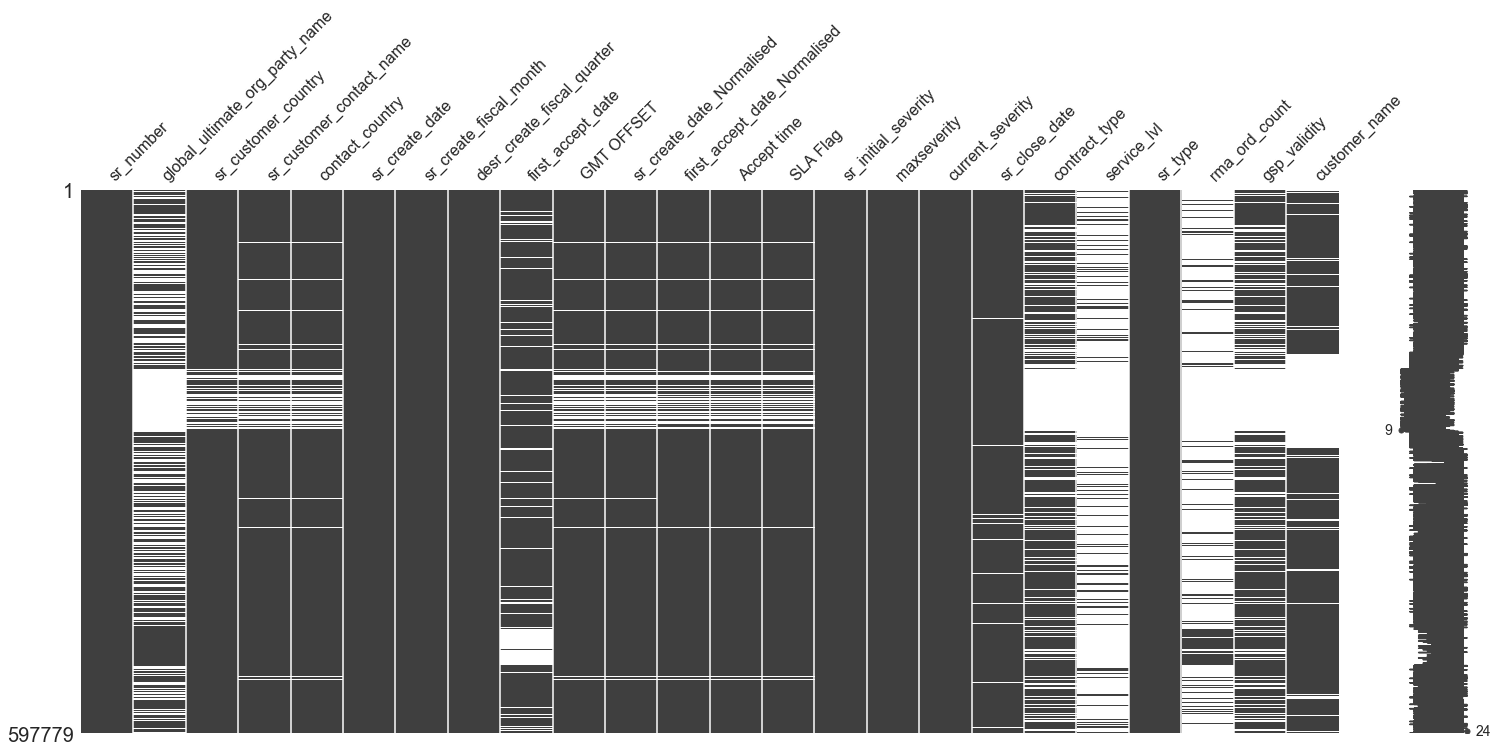

In [7]:
msno.matrix(data)
plt.show()

In [8]:
for i in data.columns:
    null_rate = data[i].isna().sum() / len(data) * 100 
    if null_rate > 0 :
        print(f"{i}'s null rate : {null_rate}%")

global_ultimate_org_party_name's null rate : 47.57928933602552%
sr_customer_country's null rate : 4.825529167133673%
sr_customer_contact_name's null rate : 8.082585704750418%
contact_country's null rate : 8.317455113009991%
first_accept_date's null rate : 14.775192838825053%
GMT OFFSET's null rate : 8.317455113009991%
sr_create_date_Normalised's null rate : 8.317455113009991%
first_accept_date_Normalised 's null rate : 7.158163803010812%
Accept time 's null rate : 7.158163803010812%
SLA Flag 's null rate : 7.158163803010812%
sr_close_date's null rate : 3.615550228428901%
contract_type's null rate : 28.999345912118024%
service_lvl's null rate : 86.22333671808478%
rma_ord_count's null rate : 79.27963344312865%
gsp_validity's null rate : 29.037319812171386%
customer_name's null rate : 21.363915426938718%


In [9]:
data.describe(include='all').head(4)

,sr_number,global_ultimate_org_party_name,sr_customer_country,sr_customer_contact_name,contact_country,sr_create_date,sr_create_fiscal_month,desr_create_fiscal_quarter,first_accept_date,GMT OFFSET,...,sr_initial_severity,maxseverity,current_severity,sr_close_date,contract_type,service_lvl,sr_type,rma_ord_count,gsp_validity,customer_name
count,597779.0,313360,568933,549463,548059,597779,597779,597779,509456,548059.0,...,597779.0,597779.0,597779.0,576166,424427,82354,597779,123862.0,424200,470070
unique,NaN,34613,208,71265,203,113257,3,1,110662,NaN,...,NaN,NaN,NaN,138037,520,3,3,NaN,22,42243
top,NaN,CISCO SYSTEMS INC,US,C3 TO BE ASSIGNED CPR COMPANY,UNITED STATES,08/10/19 8:01,Oct FY2020,Q1 FY2020,21/08/19 8:47,NaN,...,NaN,NaN,NaN,07/10/19 5:18,SNT,SWSS 1.0/2.0 Basic,TAC,NaN,8X5XNBD,CISCO SYSTEMS INC
freq,NaN,43055,270123,152342,252758,35,238514,597779,37,NaN,...,NaN,NaN,NaN,40,127697,77408,547318,NaN,204487,40835


In [11]:
from collections import Counter
contract_data = data['contract_type'].dropna()
contract_counting = pd.Series(dict(Counter(','.join(contract_data).replace(' ','').split(',')))).sort_values(ascending=False)
contract_counting

SNT                127697
SNTP                49873
ECMU                44529
PSRT                19336
C4P                 17902
                    ...  
NSNT                    1
WARR-1YR-RFR-HW         1
E2SEP                   1
CLSCG                   1
SSWEP                   1
Length: 520, dtype: int64

In [12]:
tot = sum(contract_counting)
top20 = sum(contract_counting[:20]) # 22 is real 20% but for simple processing

print(f'total : {tot}')
print(f'top 20 contract : {top20}')
print(f'percentage : {top20}/{tot} = {100 * top20/tot}')

total : 424427
top 20 contract : 334377
percentage : 334377/424427 = 78.78315941257272


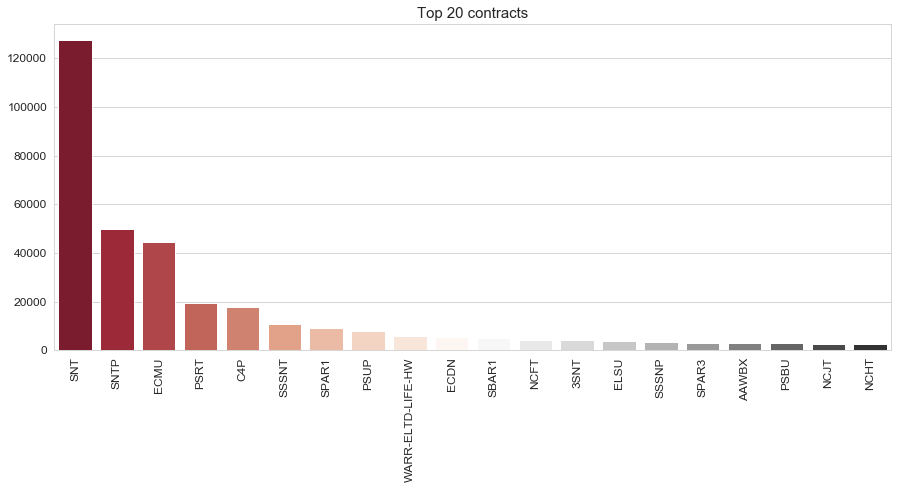

In [13]:
top20_contract = contract_counting[:20]
fig, ax = plt.subplots(1,1, figsize=(15, 6))
sns.barplot(top20_contract.index, top20_contract, ax=ax, palette="RdGy")
ax.set_xticklabels(top20_contract.index, rotation='90')
ax.set_title('Top 20 contracts', fontsize=15)
plt.show()

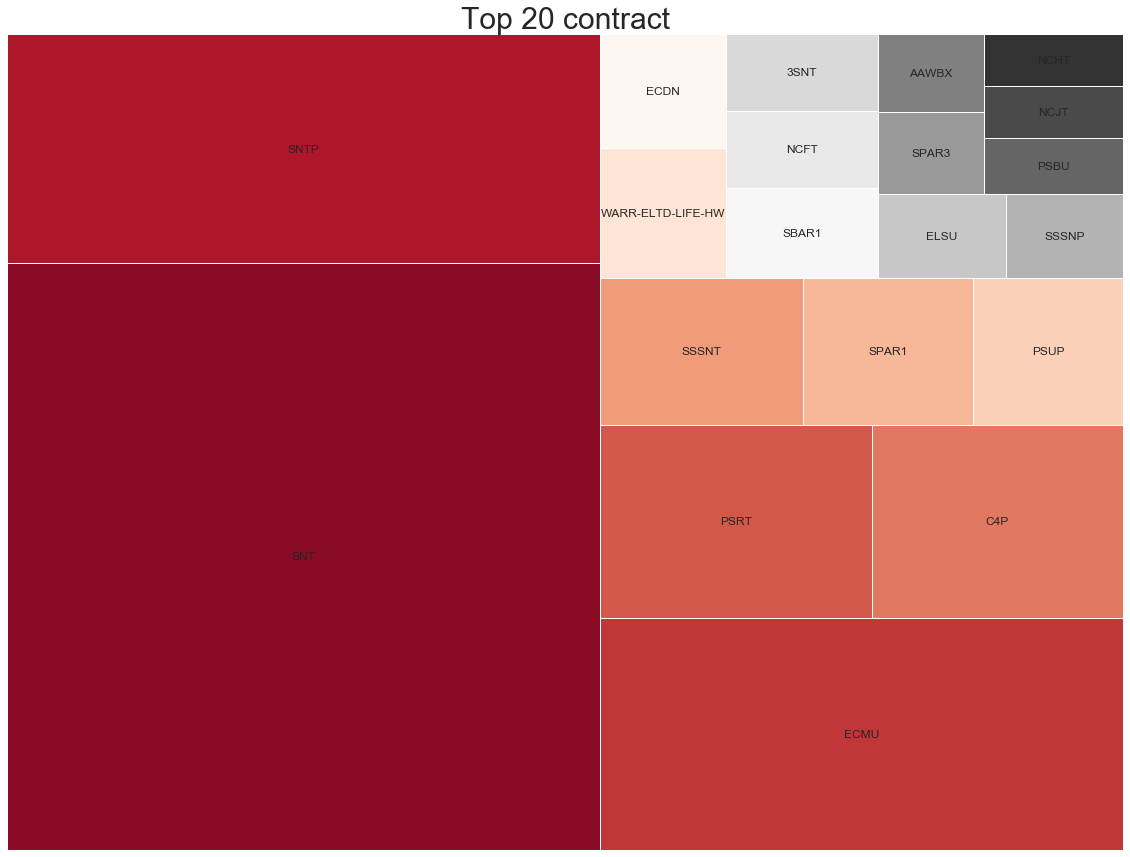

In [19]:
import squarify

y = top20_contract
plt.rcParams['figure.figsize'] = (20, 15)
squarify.plot(sizes = y.values, label = y.index, color=sns.color_palette("RdGy", n_colors=20))
plt.title('Top 20 contract', fontsize = 30)
plt.axis('off')
plt.show()